# Evaluation 1 - Linear and Logistic Regression
###### Maximum marks : 20 Marks
#### Registration Number - 24011103058
#### Name - Sharadha A
#### Task - Binary Classification

In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
df=pd.read_csv("/kaggle/input/network-intrusion-datasets/network_train.csv")
df.head()

,Packet_ID,Relative_Timestamp,Packet_Header_Integrity,Payload_Entropy_Score,Inter_Arrival_Jitter,Source_Port_Frequency,Dest_Port_Consistency,Handshake_Duration,Protocol_Violation_Index,Malformed_Packet_Rate,...,Proxy_Latency_Variation,Broadcast_Traffic_Volume,Connection_Retry_Rate,MAC_Spoofing_Indicator,Unusual_User_Agent_String,Session_Persistence_Index,Total_Packet_Payload_Size,Packet_Jitter_ms,Node_Temperature_C,Intrusion_Detected
0,PKT-7928-R,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,...,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32,39.122202,52.533596,0
1,PKT-4025-L,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,...,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99,7.828133,40.453632,0
2,PKT-2314-X,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,...,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10,6.609451,43.176828,0
3,PKT-3189-P,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,...,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10,35.728851,48.933955,0
4,PKT-4519-I,59359.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,...,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10,30.005641,45.668863,0


In [3]:
df.columns

Index(['Packet_ID', 'Relative_Timestamp', 'Packet_Header_Integrity',
       'Payload_Entropy_Score', 'Inter_Arrival_Jitter',
       'Source_Port_Frequency', 'Dest_Port_Consistency', 'Handshake_Duration',
       'Protocol_Violation_Index', 'Malformed_Packet_Rate',
       'Flag_Anomalies_TCP', 'TTL_Variance', 'Encrypted_Segment_Ratio',
       'Flow_Control_Efficiency', 'Sequence_Number_Continuity',
       'Invalid_Checksum_Count', 'SYN_Flood_Probability', 'ACK_Response_Delay',
       'DNS_Query_Pattern', 'Subnet_Scanning_Score', 'ICMP_Echo_Density',
       'Buffer_Overflow_Risk', 'Packet_Fragmentation_Index',
       'Tunneling_Detection_Score', 'Proxy_Latency_Variation',
       'Broadcast_Traffic_Volume', 'Connection_Retry_Rate',
       'MAC_Spoofing_Indicator', 'Unusual_User_Agent_String',
       'Session_Persistence_Index', 'Total_Packet_Payload_Size',
       'Packet_Jitter_ms', 'Node_Temperature_C', 'Intrusion_Detected'],
      dtype='object')

## Feature Engineering (Feature Selection/Extraction) 2 Marks

List all the feature engineering techniques you used.

Dropping Irrelevant Identifier Feature
The Packet_ID column was removed as it is a unique identifier and does not contribute to intrusion detection.

Target Variable Separation
The target variable Intrusion_Detected was separated from the feature set to create independent (X) and dependent (y) variables.

Missing Value Handling
Missing values in numerical features were handled using median imputation to avoid data loss and reduce the effect of outliers.

Train–Test Split with Stratification
The dataset was split into training and testing sets while preserving the class distribution using stratified sampling.

Feature Scaling
All numerical features were standardized using StandardScaler to bring them to a common scale, improving model convergence.

Class Imbalance Handling
Class imbalance was handled using class_weight='balanced' in Logistic Regression to ensure minority class importance.

In [4]:
## Code snippets you used

X = df.drop(['Intrusion_Detected', 'Packet_ID'], axis=1)
y = df['Intrusion_Detected']

X = X.fillna(X.median())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
model = LogisticRegression(
    class_weight='balanced',
    penalty='l2',
    C=1.0,
    max_iter=1000
)

model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

## Model Selection 5 Marks

List the different models you tried and how you selected one best model.

Model used:Logistic Regression

Evaluation Metric: ROC-AUC

Cross Validation

In [6]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

In [7]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9751804955123


In [8]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[44368  1122]
 [    9    70]]


In [9]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     45490
           1       0.06      0.89      0.11        79

    accuracy                           0.98     45569
   macro avg       0.53      0.93      0.55     45569
weighted avg       1.00      0.98      0.99     45569



In [10]:
auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", auc)

ROC-AUC: 0.972538963911946


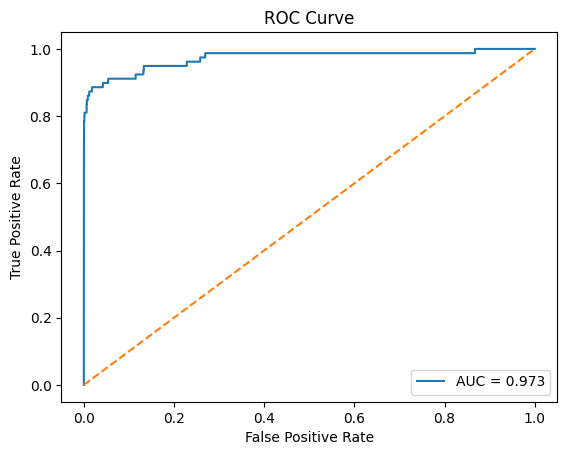

In [11]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Model Evlauation 3 Marks
List the different techniques that you used to evaluate the model
Accuracy Score

Confusion Matrix

Classification Report

ROC–AUC Score

Stratified K-Fold Cross-Validation

In [12]:
X_scaled = scaler.fit_transform(X)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_auc = cross_val_score(model, X_scaled, y, cv=cv, scoring='roc_auc')

print("CV AUC scores:", cv_auc)
print("Mean CV AUC:", cv_auc.mean())

CV AUC scores: [0.99258518 0.98066177 0.96829711 0.99503466 0.97559375]
Mean CV AUC: 0.9824344912682811


In [13]:
joblib.dump(model, "trained_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

## Model Evlauation 3 Marks
Running on test

In [14]:
test_df = pd.read_csv("/kaggle/input/network-intrusion-datasets/network_test.csv")
packet_ids = test_df["Packet_ID"]

X_test_final = test_df.drop("Packet_ID", axis=1)
X_test_final = X_test_final.fillna(X_test_final.median())

# Load fitted model and scaler (optional, can also use current model)
scaler = joblib.load("scaler.pkl")
model = joblib.load("trained_model.pkl")

X_test_scaled = scaler.transform(X_test_final)

test_probs = model.predict_proba(X_test_scaled)[:, 1]

submission = pd.DataFrame({
    "Packet_ID": packet_ids,
    "Intrusion_Detected": test_probs
})

submission.to_csv("submission.csv", index=False)
print("Submission file created successfully!")

Submission file created successfully!
